In [1]:
import pygmt
import h5py
import numpy as np

In [16]:
with h5py.File("./OUTPUT_FILES/final_model.h5", "r") as f:
    vs = f["vs"][:]
    lat = f["lat"][:]
    lon = f["lon"][:]
    dep = f["dep"][:]

with h5py.File("./OUTPUT_FILES/model_iter.h5", "r") as f:
    stx = f["stlo_ph"][:]
    sty = f["stla_ph"][:]
region = [lon.min(), lon.max(), lat.min(), lat.max()]
XX, YY = np.meshgrid(lon, lat, indexing="ij")

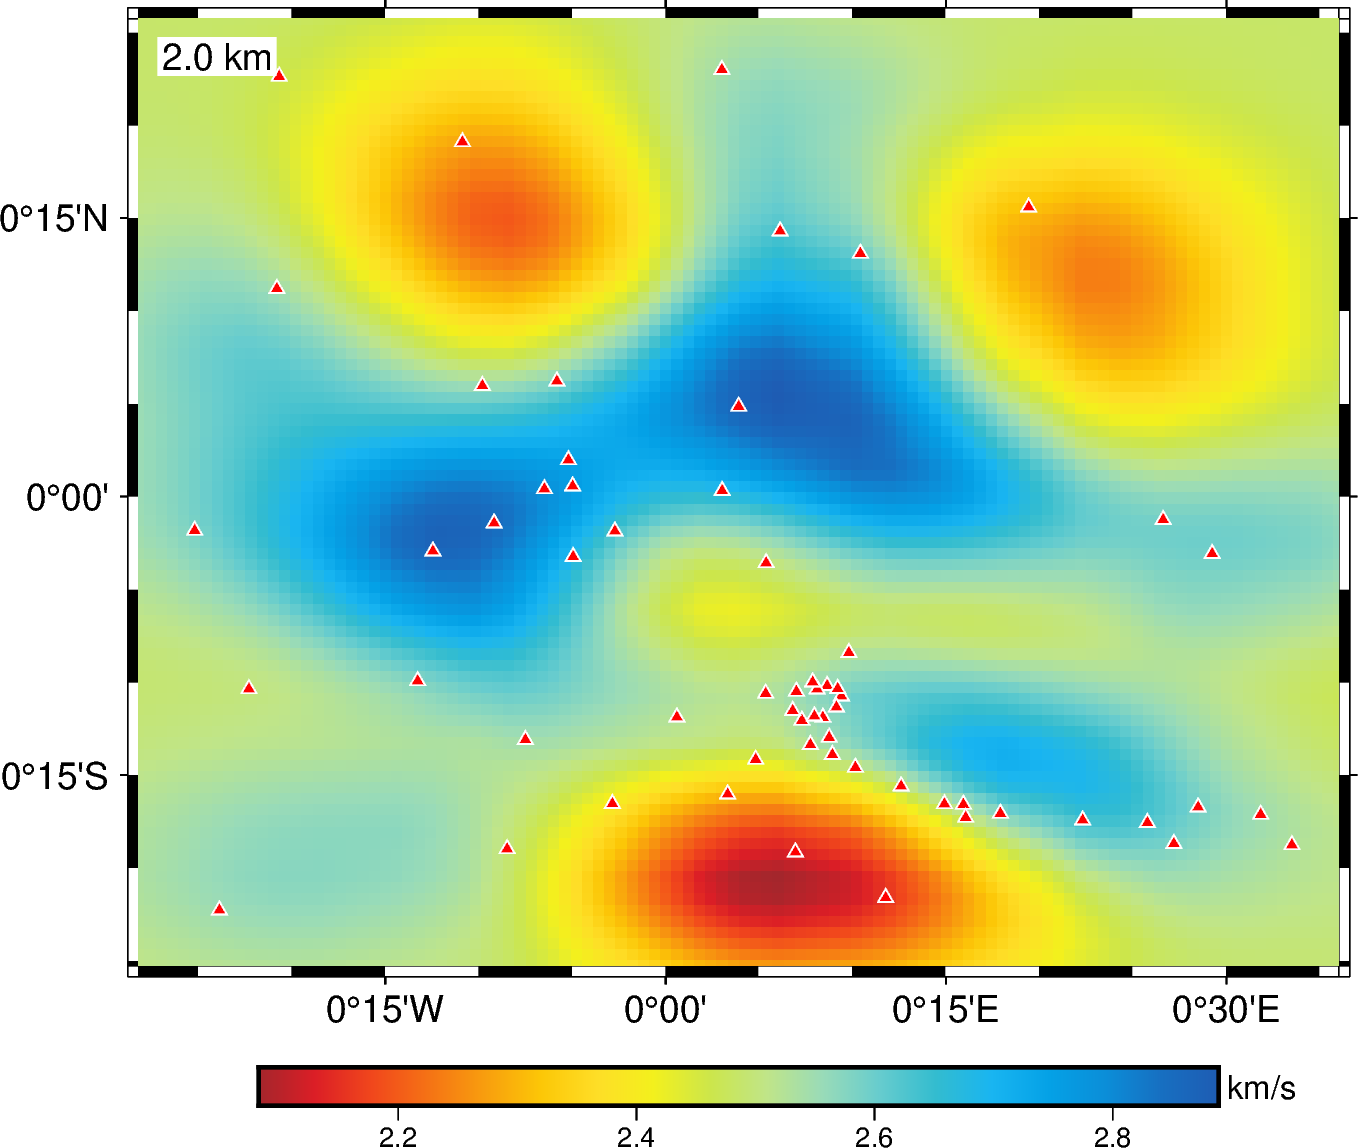

In [17]:
idep = 4
tag = vs[:,:,idep]
fig = pygmt.Figure()
fig.basemap(region=region, projection="M4i", frame=True)
grid = pygmt.surface(x=np.ravel(XX), y=np.ravel(YY), z=np.ravel(tag), region=region, spacing="0.01" )
pygmt.makecpt(cmap="temperature_conti.cpt", series=[tag.min(), tag.max()], reverse=True)
fig.grdimage(grid=grid)
fig.plot(x=stx, y=sty, style="t0.15c", fill="red", pen="0.3p,255")
fig.colorbar(frame=["a0.2", "y+lkm/s"])
fig.text(
        position="TL",
        offset="0.2c/-0.2c",
        text="%.1f km" % (dep[idep]),
        fill = 'white'
        )
fig.show()